In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_47417_I')

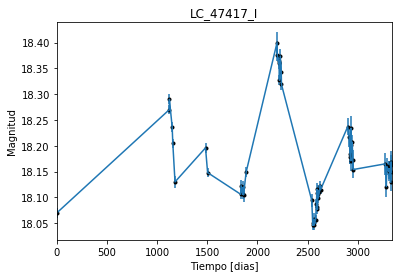

In [2]:
data = np.genfromtxt('LC_47417_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_47417_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

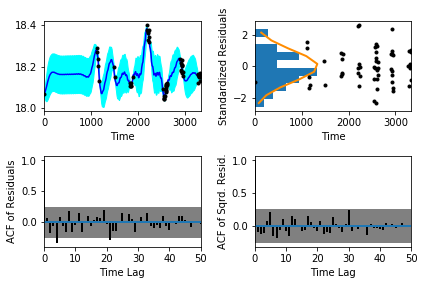

In [5]:
sample.assess_fit()

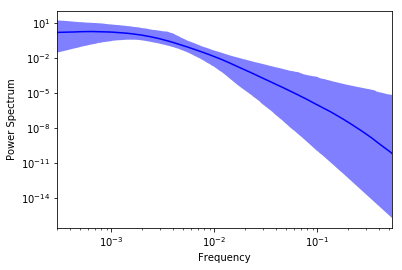

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_47417_I')

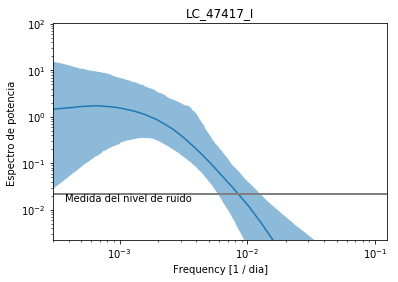

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_47417_I')

Text(0.5,1,'Prediccion , valor esperado LC_47417_I')

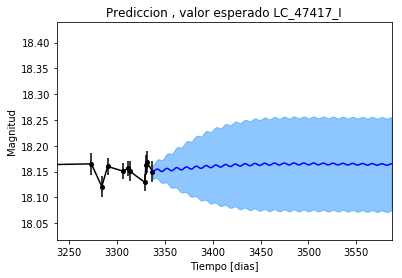

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_47417_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_47417_I')

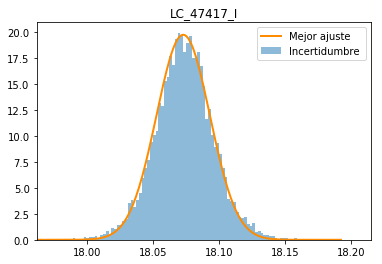

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_47417_I')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_I')

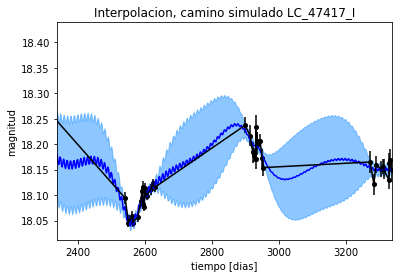

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_I')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_I')

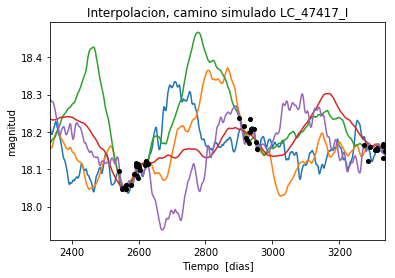

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 639.992235314
Median: 0.00827870437965
Standard deviation: 0.203631009898
68% credibility interval: [ 0.00086128  0.21396996]
95% credibility interval: [  3.51376487e-04   8.04403425e-01]
99% credibility interval: [  3.13396988e-04   1.00527661e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 451.879286206
Median: 0.00174972106773
Standard deviation: 0.0898510542973
68% credibility interval: [ 0.00052977  0.02146576]
95% credibility interval: [ 0.00033255  0.3154022 ]
99% credibility interval: [  3.08530485e-04   6.41362088e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 639.1725111
Median: 0.0200658064094
Standard d

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 706.923700715
Median: 153.304664848
Standard deviation: 1.80091260011
68% credibility interval: [ 151.34317791  154.70354395]
95% credibility interval: [ 148.81666978  155.9275424 ]
99% credibility interval: [ 146.66392429  156.67768732]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 204.965372172
Median: 0.904802732932
Standard deviation: 2.29714158669
68% credibility interval: [ 0.0738233   4.33474297]
95% credibility interval: [ 0.01989529  7.56860601]
99% credibility interval: [  0.0122882   11.20926818]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 453.769279916
Median: 0.339977703331
Standard deviation: 9.6787568872
68% credibility interval: [ 0.01843884  7.77860088]
95% credibility interval: [  1.83175777e-

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2569.7928914
Median: 6.65679970521e-25
Standard deviation: 2.65626165962e+58
68% credibility interval: [  6.91638632e-150   2.50474446e+042]
95% credibility interval: [  1.30625551e-207   4.98277976e+055]
99% credibility interval: [  7.71297464e-226   1.42349978e+058]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3046.45519044
Median: 18.1773231193
Standard deviation: 0.0375080939146
68% credibility interval: [ 18.14477659  18.20547691]
95% credibility interval: [ 18.09502693  18.24807181]
99% credibility interval: [ 18.04818075  18.29513125]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 168.754053193
Median: 0.00207182309072
Standard deviation: 0.248777316388
68% credibility interval: [ 0.          0.27898974]
95% credibility interval: [ 0.          0.94234499]
99% credibility interval: [ 0.          1.05923118]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 168.754053193
Median: 0.00207182309072
Standard deviation: 0.248777316388
68% credibility interval: [ 0.          0.27898974]
95% credibility interval: [ 0.          0.94234499]
99% credibility interval: [ 0.          1.05923118]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 365.417630467
Median: 0.0
Standard deviation: 0.00100378538487
68% c

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 706.923700715
Median: 153.304664848
Standard deviation: 1.80091260011
68% credibility interval: [ 151.34317791  154.70354395]
95% credibility interval: [ 148.81666978  155.9275424 ]
99% credibility interval: [ 146.66392429  156.67768732]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1956.17833411
Median: 0.00938879752523
Standard deviation: 0.0105643925912
68% credibility interval: [ 0.00588955  0.01712568]
95% credibility interval: [ 0.00406653  0.03609555]
99% credibility interval: [ 0.00324566  0.06570141]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 477.719092209
Median: 1.24979094802
Standard deviation: 0.233069092266
68% credibility interval: [ 1.03864493  1.51038965]
95% credibility interval: [ 0.84924666  1.75702837]
99% credibility interval: [ 0.74049707  1.91738297]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 552.286550763
Median: 2.78413938725e-05
Standard deviation: 0.0557508773766
68% credibility interval: [  5.42138930e-46   3.57176564e-03]
95% credibility interval: [  2.28628863e-60   5.76110927e-02]
99% credibility interval: [  7.36436035e-63   2.34469710e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 639.992235314
Median: (-0.0520166337207+0j)
Standard deviation: 2.01998047478
68% credibility interval: [-1.34441288-1.49274056j -0.00541158-0.00726068j]
95% credibility interval: [ -5.05421578e+00+0.j          -2.20776358e-03-0.01305271j]
99% credibility interval: [ -6.31633921e+00+0.j         -1.96913135e-03-4.3405979j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 451.879286206
Median: (-0.0109938217044+0.0205980241908j)
Standard deviation: 1.66193951296
68% credibility interval: [-0.13487334+1.46266566j -0.00332864+0.j        ]
95% credibility interval: [-1.98173048+6.30725379j -0.00208950+0.00650605j]
99% credibility interval: [ -4.02979685e+00+5.56645471j  -1.93855421e-03+0.00876699j]
Posterior summary for para